In [1]:
import os
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir,os.pardir))
os.chdir(parent_dir)

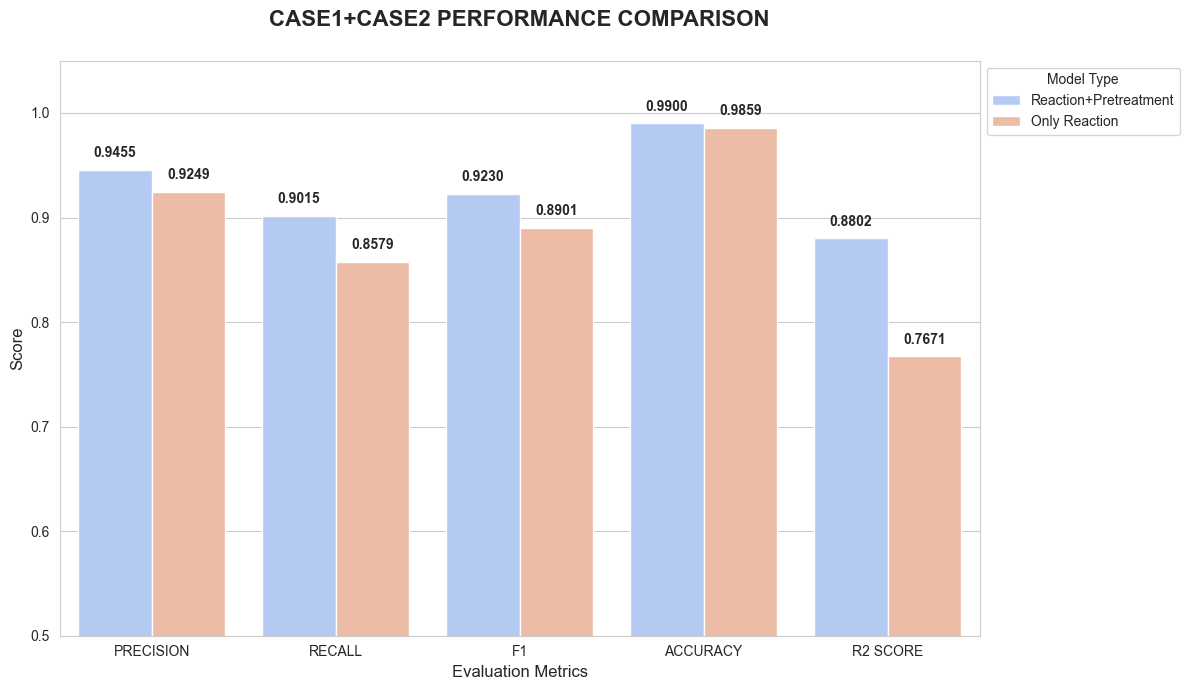


[Additional Analysis: BCE Loss]
Only Reaction: 0.0445 -> Reaction+Pretreatment: 0.0311
Improvement: 30.07% reduction in loss


In [11]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data():
    # 데이터 로드 (파일 경로 및 이름 확인 필요)
    try:
        with open('reaction_condition_metrics.json', 'r') as f: reaction_metrics = json.load(f)
        with open('pre_re_condition_metrics.json', 'r') as f: pre_re_metrics = json.load(f)
        with open('re_mse_metrics.json', 'r') as f: re_data = json.load(f)
        with open('pre_re_mse_metrics.json', 'r') as f: pre_re_data = json.load(f)
        return reaction_metrics, pre_re_metrics, re_data, pre_re_data
    except FileNotFoundError as e:
        print(f"파일을 찾을 수 없습니다: {e}")
        return None

def prepare_unified_df(m1, m2, m3, m4):
    unified_list = []
    
    # 1. Classification 지표 추가 (CASE 1)
    for key in ["precision", "recall", "f1", "accuracy"]:
        unified_list.append({"Metric": key.upper(), "Value": m2[key], "Model": "Reaction+Pretreatment"})
        unified_list.append({"Metric": key.upper(), "Value": m1[key], "Model": "Only Reaction"})
        
    # 2. Regression 지표 추가 (CASE 2 - R2 Score)
    unified_list.append({"Metric": "R2 SCORE", "Value": m4["R2"], "Model": "Reaction+Pretreatment"})
    unified_list.append({"Metric": "R2 SCORE", "Value": m3["R2"], "Model": "Only Reaction"})
    
    return pd.DataFrame(unified_list)

def plot_unified_results(df):
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 7))
    
    palette = "coolwarm"
    ax = sns.barplot(data=df, x="Metric", y="Value", hue="Model", palette=palette)
    
    plt.title("CASE1+CASE2 PERFORMANCE COMPARISON", fontsize=16, fontweight='bold', pad=25)
    
    # 이 부분을 0.5로 수정합니다
    plt.ylim(0.5, 1.05) 
    
    plt.ylabel("Score", fontsize=12)
    plt.xlabel("Evaluation Metrics", fontsize=12)
    plt.legend(title="Model Type", loc='upper left', bbox_to_anchor=(1, 1))

    for p in ax.patches:
        height = p.get_height()
        # Y축이 0.5부터 시작하므로, 0.5보다 큰 값만 표시되도록 조건을 걸어주면 더 안전합니다.
        if height > 0.5:
            ax.annotate(f'{height:.4f}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='bottom', 
                        xytext=(0, 7), 
                        textcoords='offset points', 
                        fontsize=10, 
                        fontweight='bold')

    plt.tight_layout()
    plt.show()

# 실행 프로세스
data = load_data()
if data:
    m1, m2, m3, m4 = data
    df_unified = prepare_unified_df(m1, m2, m3, m4)
    plot_unified_results(df_unified)
    
    # BCE 개선율 별도 출력 (그래프 스케일 문제로 텍스트로 보완)
    bce_r, bce_p = m1['bce'], m2['bce']
    improvement = ((bce_r - bce_p) / bce_r) * 100
    print(f"\n[Additional Analysis: BCE Loss]")
    print(f"Only Reaction: {bce_r:.4f} -> Reaction+Pretreatment: {bce_p:.4f}")
    print(f"Improvement: {improvement:.2f}% reduction in loss")